In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_img(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('/Users/vishalsingh/Desktop/Data/ML/ComputerVision/Computer-Vision-with-Python/DATA/reeses_puffs.png',0)


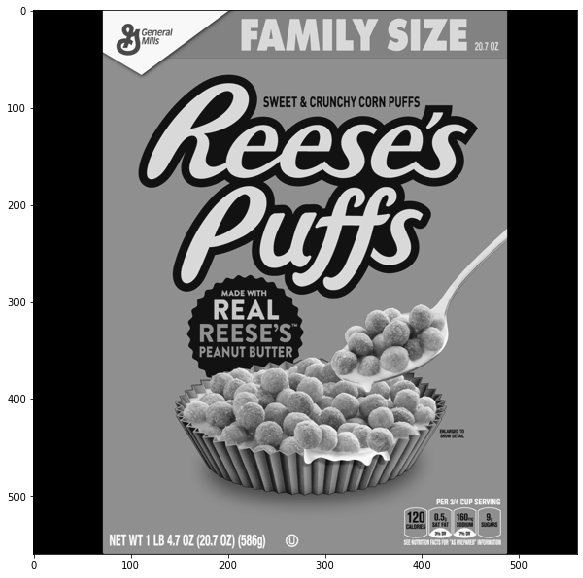

In [4]:
display_img(reeses)

In [5]:
cereals = cv2.imread('/Users/vishalsingh/Desktop/Data/ML/ComputerVision/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)

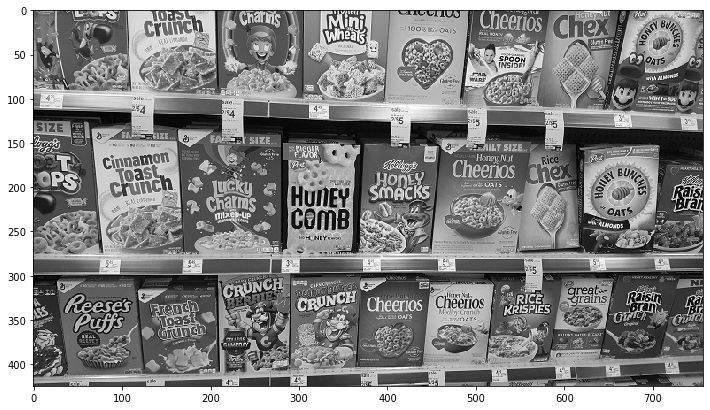

In [6]:
display_img(cereals)

In [7]:
orb = cv2.ORB_create()

In [8]:
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [10]:
matches = bf.match(des1,des2)

In [11]:
single_match = matches[0]

In [12]:
single_match.distance

69.0

In [13]:
matches = sorted(matches,key=lambda x:x.distance)

In [14]:
reeses_match = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

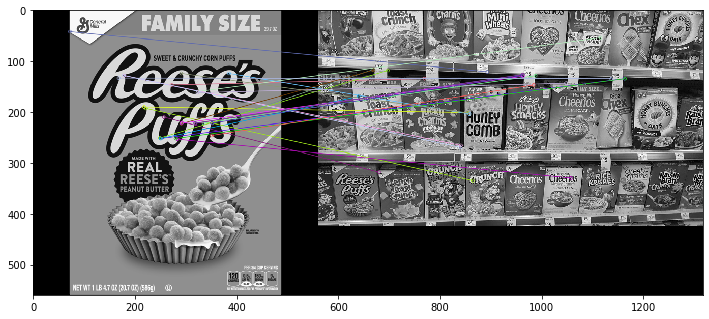

In [15]:
display_img(reeses_match)

In [16]:

sift = cv2.xfeatures2d.SIFT_create()

In [19]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [27]:
bf = cv2.BFMatcher()

In [25]:
matches = bf.knnMatch(des1,des2,k=2)

In [29]:
good = []

#LESS DISTANCE == BETTER MATCH

#Ratio Match1 < 75% Match2

for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [30]:
good

[[<DMatch 0x121822f70>],
 [<DMatch 0x121826570>],
 [<DMatch 0x1218265b0>],
 [<DMatch 0x1218267b0>],
 [<DMatch 0x121826db0>],
 [<DMatch 0x1218280f0>],
 [<DMatch 0x121828270>],
 [<DMatch 0x1218285f0>],
 [<DMatch 0x121828830>],
 [<DMatch 0x121828bf0>],
 [<DMatch 0x121828cf0>],
 [<DMatch 0x12182bfb0>],
 [<DMatch 0x12182e030>],
 [<DMatch 0x12182e130>],
 [<DMatch 0x12182eeb0>],
 [<DMatch 0x121830830>],
 [<DMatch 0x1218308f0>],
 [<DMatch 0x1218309b0>],
 [<DMatch 0x121823270>],
 [<DMatch 0x1218233b0>],
 [<DMatch 0x1218344f0>],
 [<DMatch 0x121834630>],
 [<DMatch 0x121834670>],
 [<DMatch 0x121834830>],
 [<DMatch 0x121834870>],
 [<DMatch 0x121836ab0>],
 [<DMatch 0x121836c30>],
 [<DMatch 0x121836c70>],
 [<DMatch 0x121839270>],
 [<DMatch 0x121839370>],
 [<DMatch 0x121839430>],
 [<DMatch 0x1218399f0>],
 [<DMatch 0x121839d70>],
 [<DMatch 0x121839e30>],
 [<DMatch 0x12183b370>],
 [<DMatch 0x12183b5f0>],
 [<DMatch 0x12183be70>],
 [<DMatch 0x12183bf30>],
 [<DMatch 0x12183ef70>],
 [<DMatch 0x12183efb0>],


In [33]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None,flags=2)

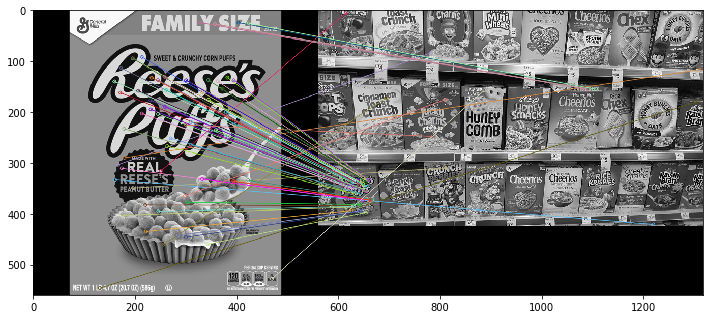

In [34]:
display_img(sift_matches)

In [54]:
sift = cv2.xfeatures2d.SIFT_create()

In [55]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [56]:
#FLANN
FLANN_INDEX_KDTREE = 0
index_param = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_param = dict(checks=50)

In [57]:
flann = cv2.FlannBasedMatcher(index_param,search_param)

In [59]:
matches = flann.knnMatch(des1,des2,k=2)
#matches

In [60]:
matchesMask = [[0,0]for i in range(len(matches))]

In [62]:
#matchesMask

In [64]:


for i, (match1, match2) in enumerate (matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]
    

In [67]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

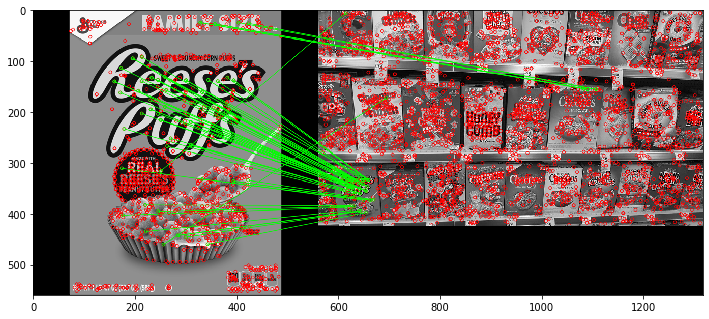

In [68]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display_img(flann_matches)

In [ ]:
dis